# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [1]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [2]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

In [3]:
print(X)
print(y)

[[ 9.01742889  3.53826763]
 [-0.77872546 -2.58067738]
 [ 9.97648703  4.77979357]
 [ 4.62202905  0.06872601]
 [ 9.56248249  3.54238946]
 [ 4.16506661 -1.05599654]
 [ 0.38179854 -3.96527091]
 [ 8.93545608  3.09158212]
 [ 5.88879505 -6.30225906]
 [ 4.35553035 -5.88262305]
 [ 4.0634105  -3.57273923]
 [ 9.73211208  3.38882045]
 [ 8.99125912  5.5010311 ]
 [-6.7141608  -0.15803196]
 [10.49670089  4.58403709]
 [-1.15713199 -0.97959263]
 [ 9.65373104  2.74809615]
 [-6.78357351  0.35667678]
 [ 1.19413897 -1.82708636]
 [ 8.25527629  4.47059477]
 [ 0.75008164 -2.25181519]
 [ 7.77325213  4.79812076]
 [-0.42937616 -3.27017895]
 [ 9.06821832  3.69651925]
 [ 5.36351183 -1.37757708]
 [ 5.09158776 -5.37441635]
 [-5.433328    3.98492083]
 [ 8.87614169  3.98380905]
 [ 8.03905112  3.56903261]
 [-6.14542186 -0.66575703]
 [-0.48375305 -4.43026735]
 [-5.95394321 -0.28286993]
 [-0.29987107 -2.20666133]
 [10.02914705  3.74393665]
 [-4.56691262  1.39591497]
 [-3.5484173  -2.87163863]
 [-0.93106004 -2.34555357]
 

In [4]:
# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

In [5]:
# 計算並繪製輪廓分析的結果
silhouette_avgs = []
for n_c in range_n_clusters:
    # KMeans 演算法
    kmeans_fit = KMeans(n_clusters = n_c).fit(X)
    
    # 印出分群結果
    cluster_labels = kmeans_fit.labels_
    print("分群結果：")
    print(cluster_labels)
    print("---")
    
    # 印出品種看看
    print("真實群組：")
    print(y)
    print("---")
    
    # 印出績效 (數值愈接近 1 表示績效愈好，反之愈接近 -1 表示績效愈差。)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print("silhouette c=", n_c, ":", silhouette_avg)
    print("----------------------------")

分群結果：
[0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0
 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1
 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1
 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 

分群結果：
[5 3 2 4 5 4 3 5 7 7 0 5 2 1 2 6 5 1 6 2 6 2 3 5 4 7 1 2 5 1 3 1 6 5 1 3 3
 7 4 5 1 5 7 3 5 0 0 6 2 4 7 6 2 4 0 7 1 3 1 3 0 1 1 1 6 7 3 4 0 4 4 1 1 5
 4 1 4 1 3 4 6 4 2 4 1 6 0 1 7 6 1 7 3 3 3 4 6 0 1 0 3 6 1 1 6 6 1 1 6 6 4
 4 1 4 0 4 1 6 4 1 1 2 5 4 5 6 6 7 2 4 4 5 0 6 3 1 1 0 5 0 4 1 7 6 0 6 1 2
 4 7 3 5 3 2 5 1 7 4 7 5 4 6 7 5 1 0 6 3 2 2 7 1 4 4 4 3 1 4 5 0 2 5 3 0 4
 6 0 1 1 2 1 1 7 1 6 6 5 4 1 2 5 4 1 6 0 2 6 3 1 7 7 7 1 5 7 3 0 0 4 2 1 5
 7 7 4 1 2 1 5 1 2 2 7 1 4 4 1 7 3 4 1 2 6 4 0 1 7 6 2 5 2 6 0 0 0 1 1 3 0
 6 1 6 1 1 1 6 3 1 7 7 0 2 4 5 0 2 4 6 5 0 5 5 1 1 7 3 0 5 7 0 0 3 4 4 1 3
 2 7 7 0 0 1 2 5 1 5 0 0 1 6 6 0 7 1 7 7 1 7 7 1 4 6 4 5 0 1 5 7 7 1 1 5 1
 4 3 6 3 5 3 1 4 6 1 6 1 7 7 4 6 1 6 1 1 4 1 6 5 1 4 2 4 7 0 1 5 0 0 4 7 1
 4 4 3 6 2 7 3 1 2 6 4 4 7 6 2 5 1 4 4 6 2 7 5 5 5 5 2 7 1 6 6 3 7 5 2 4 6
 0 3 0 7 6 0 4 4 2 7 4 7 7 1 4 5 7 7 0 6 4 3 5 7 5 7 1 7 3 1 0 7 3 1 5 1 1
 0 0 6 1 1 5 4 5 4 4 4 5 1 0 7 0 1 2 3 6 4 1 7 6 4 1 5 2 5 6 7 7 4 0 7 7 4
 4 5 3 5 0 4 4 4 7 

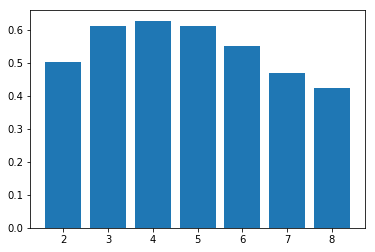

[0.5027144446956527, 0.6105565451092732, 0.6270122040179333, 0.6115749260799671, 0.5510541838971206, 0.46947524101262456, 0.4220644024301293]


In [6]:
# 作圖並印出 k = 2 到 8 的績效
plt.bar(range_n_clusters, silhouette_avgs)
plt.show()
print(silhouette_avgs)

分群在 4 組時，結果最好